#**Understanding the Value and Vulnerability of U.S. Freight Corridors**
**Team A05:** Fei Han, Kefei Zhang, Roberto Albornoz, Samuel Buelvas & Shanmathi Sivakumar

###**Link to Tableau Public Dashboard**:
[Click Here](https://public.tableau.com/views/TeamProject_17650648355990/Dashboard?:language=es-ES&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)



### **Problem Definition**
Despite the U.S. freight transportation network's vast scale and economic importance, the structure of its most critical arteries creates systemic risks. The core problem is the lack of a quantitative assessment linking the high economic value carried by specific domestic Origin-Destination (O-D) corridors with their degree of modal dependence. This gap in knowledge means policymakers, planners, and logistics firms lack the necessary data to accurately prioritize infrastructure investment and mitigate the cascading economic risks associated with mode-specific capacity disruptions in the nation's most valuable supply chains

##**Introduction and Motivation**

For firms, investors, and governments, the U.S. freight system is both a core asset and a hidden risk. Most corporate and policy decisions implicitly assume that trucks, trains, ships, and planes will keep moving goods reliably and at scale. Yet the economic value carried through a relatively small number of state-to-state freight corridors is enormous, and many of these corridors depend heavily on a single mode—most often trucking. Understanding where value is concentrated and how fragile those flows are is therefore a financial and strategic question, not just a logistics detail.

This project is motivated by the need to link freight data with economic risk and return. The objective is to produce a portfolio view of U.S. freight corridors: which corridors behave like high-yield but fragile assets, which function as stable but low-margin bulk lanes, and which represent small but strategically critical links because of asymmetric dependence or lack of substitutes.

### **Data Sources:**

**Commodity Flow Survey  2022**

Commodity Flow Survey (CFS),  jointly produced by the Bureau of Transportation Statistics (BTS) and the U.S. Census Bureau, provides the most comprehensive data on freight movement in the U.S. It captures shipment characteristics such as value, tonnage, distance, and mode of transport across commodities and geographies.

**License**: Public domain (U.S. Government data).

**Access**:

Main data site: https://www.census.gov/data/tables/2022/econ/cfs/aff-2022.html

Data Dictionary (2022): https://www2.census.gov/programs-surveys/cfs/tables/2022/CFS%20Data%20Dictionary%20for%20Downloadable%20Tables_2022.xlsx

**Tables Used**:

|Table Name|Description|Primary Use Case|Size|
|----------|-----------|----------------|----|
|`CF1700A21`| Shipment Characteristics by Origin Geography by Destination Geography by Commodity by Mode|Core data for modal concentration and vulnerability (Phases II & III)|$\sim$4.77 Million Rows (0.9 GB)|
|`CF1700A20`| Shipment Characteristics by Origin Geography by Destination Geography|Mapping the top-value corridors (Phase I)|$\sim$38.5 Thousand Rows (5.9 MB)
|`CF1700A13`| Shipment Characteristics by Commodity by Mode by Distance Shipped for the United States|Analyzing modal mix by distance (Phase II)|$\sim$5.36 Thousand Rows (756 KB)


**CFS Data Dictionary (2022)**

Including the most relevant variables and those used in this project.

|Variable|Description|Values|Data Type|
|--------|-----------|------|---------|
|`GEOTYPE`| Geographic level indicator, represents the level of aggregation in terms of geographic areas.| 01=U.S., 02=State, 11=Region, 12=Division, 16=CFS area| `String`|
|`ST`|State FIPS Code, unique for each state and assigned to different geographic areas according to the data aggregation level|01-56|`String`|
|`GEO_ID`|Geographic identifier for transportation origin, unique for each geographic area to the minimun level of aggreagation| Alphanumeric code| `String`|
|`GEO_TTL`| Name of the origin geographic area|Text|`String`|
|`DDESTGEO`|Geographic identifier for transportation destination, unique for each geographic area to the minimun level of aggreagation|Alphanumeric code| `String`|
|`DDESTGEO_TTL`|Name of the destination geographic area|Text|`String`|
|`COMM`|Commodity code, unique identifier for specific commodities and commodities categories, depending on aggregation level|2-4 numeric ID| `String`|
|`COMM_TTL`|Commodity name|Text|`String`|
|`DMODE`| Mode category code. Type of transportation used to move commodities from origin to destination.|2-4 numeric ID| `String`|
|`DMODE_TTL`|Code category name, unique for each transportation mode to the minimun level of aggreagation|Text|`String`|
|`SHIPDIST`|Distance shiped code, encoded per distance category|01-10|`String`|
|`SHIPDIST_TTL`|Meaning of distance shiped code, label|Text|`String`|
|`SHIPWT`|Shipment weight code, encoded per weight category|01-10|`String`|
|`SHIPWT_TTL`|Meaning of shipment weight code, label|Text|`String`|
|`VAL`|Value of commodity in USD million|0-99,999,999|`Integer`|
|`TON`|Tons of commodity in thousands|0-99,999,999|`Integer`|
|`AVGMILE`|Average miles per shipment|0-9,999|`Float`|


**Bureau of Economic Analysis (BEA) Regional Data – GDP by State**

Bureau of Economic Analysis (BEA) produces official U.S. economic statistics that measure national, regional, industry, and international economic performance. Its datasets include Gross Domestic Product (GDP), personal income, industry output, trade in goods and services, and state- and county-level economic indicators. BEA’s state GDP program provides consistent, comparable measures of economic activity across states and industries, enabling detailed regional economic analysis.

**License:** Public domain (U.S. Government data).

**Access:**

Main data site: https://apps.bea.gov/histdatacore/HistFileDetails.html?HistCateID=1&FileGroupID=306

Data Dictionary: Available in the download of the data sets.

**Tables used:**
|Table Name|Description|Primary Use Case|Size|
|----------|-----------|----------------|----|
|`SAGDP2__ALL_AREAS_1997_2024`| Provides annual current-dollar GDP estimates for each U.S. state and the District of Columbia|Core data for economic impact (Phases II & III)|5528 Rows (1.7 mb)|

**Data Dictionary**

|Variable|Description| Values|Data Type|
| -------|---------- | ----- |---------|
|`GeoFIPS`| Geographic identifier code assigned by BEA for national, regional, and state areas. | 00000 = U.S.; 01000–56000 = States; additional codes represent BEA regions/divisions. |`String`|
|`GeoName`| Name of the geographic area corresponding to `GeoFIPS`.| Examples: “United States”, “Alabama”, “Great Lakes Region”.|`String`|
|`Region`| BEA economic region classification.| Examples: “Southeast”, “Mideast”, “Far West”, “Plains”.|`String`|
|`TableName`| Identifier of the BEA table represented in the dataset.| Always `"SAGDP2"` in this file.| `String`|
| `LineCode`|Numeric code representing the industry or aggregate line in the GDP table.| Examples: 1 = All industry total; 2 = Private industries; 11 = Agriculture; etc.|`Integer`|
| `IndustryClassification`|NAICS-based industry code or range associated with the row’s industry.| Examples: “11”, “111-112”, “31-33”, “52”.|`String`|
|`Description`|Industry or aggregate label describing the economic activity category.| Examples: “All industry total”, “Farms”, “Manufacturing”, “Finance and insurance”.| `String`|
| `Unit`|Unit of measure for all annual GDP values.| “Millions of current dollars”.| `String`|
| `1997`–`2024`|Annual state GDP value for each year, by industry and geography.| Numeric GDP amounts; may contain missing values.| `Float`|

**U.S. Census Bureau - State Population Totals and Components of Change: 2020-2022**

State Population Totals and Components of Change (2020–2024), produced by the U.S. Census Bureau, provides the official annual population estimates for all U.S. states, the District of Columbia and Puerto Rico. The dataset captures key demographic indicators including total population, natural increase (births minus deaths), net domestic migration, net international migration, and residual components. These estimates help track population growth, demographic change, and migration patterns across states over time.

**License:** Public domain (U.S. Government data).

**Access:**

Main data site: https://www2.census.gov/programs-surveys/popest/tables/2020-2022/state/totals/

Technical documentation: https://www.census.gov/programs-surveys/popest/technical-documentation/methodology.html

**Tables used:**
|Table Name|Description|Primary Use Case|Size|
|----------|-----------|----------------|----|
|`NST-EST2022-POP`| This table provides annual state-level population estimates from 2020 to 2022, including total population and the demographic components that drive population change|Core data for demographic impact (Phases II & III)|56 Rows (4 kb)|

**Data Dictionary**
|Variable|Description| Values|Data Type|
| -------|---------- | ----- |---------|
|`Geographic Area`| Geographic identifier code assigned by BEA for national, regional, and state areas. |Names/Labels|`String`|
|`Estimate 2020`| Estimated population for 2020 as of july 2020|Number of people|`Integer`|
|`2020-2022`|Population as of july 1st that year|Number of people|`Integer`|

##**ER-Diagram**

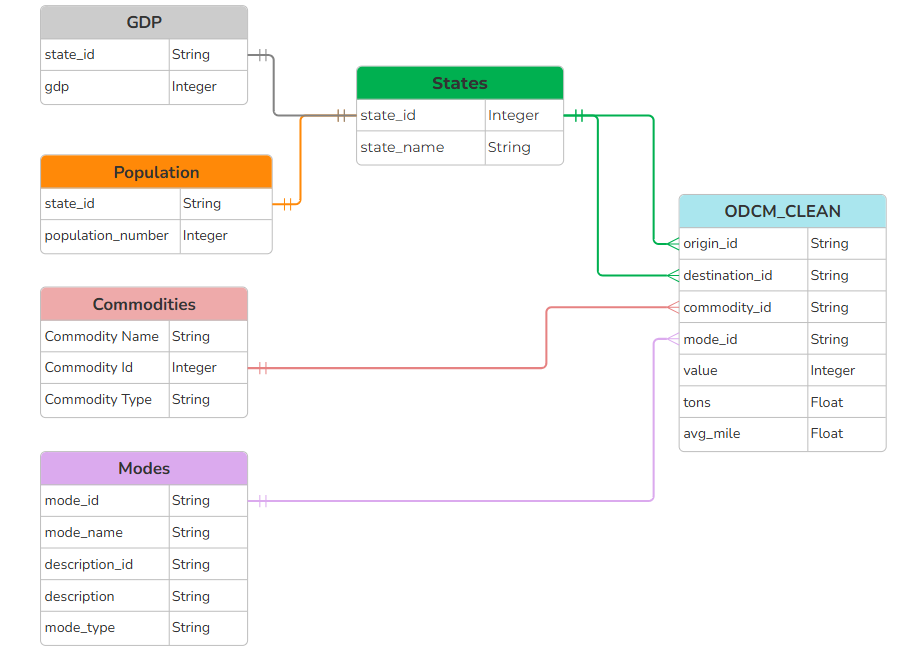

##**Executive Summary**

The U.S. freight network moves trillions of dollars in goods annually, yet its most economically important corridors remain unevenly distributed and heavily dependent on a small set of transportation modes, especially trucking. This project analyzes the 2022 Commodity Flow Survey along with state GDP and population data to identify the highest-value freight corridors, diagnose their modal dependence, and quantify their vulnerability to disruption. Our results show that the economic core of U.S. freight is concentrated in large intrastate flows (e.g., Texas, California, Florida), where trucking carries 40–60% of shipment value despite multimodal availability. Mode-concentration metrics and stress-test simulations reveal that a 10–20% reduction in truck capacity would generate substantial economic losses, highlighting systemic exposure in both high-value corridors and smaller remote states that lack modal alternatives. We also identify corridors that are economically efficient yet structurally fragile, as well as asymmetric dependencies where smaller states rely heavily on larger regional hubs. Based on these findings, we recommend prioritizing resilience investments in truck-dominated core corridors, expanding multimodal substitution where feasible, and monitoring asymmetric or geography-constrained corridors for supply-chain risk.



##**Data Cleaning**


###**CFS Data**

When creating a table in the dataset we faced a problem with the automatic schema option from BigQuery. It raised a lot of error due to the definition of certain columns. To handle it we define a schema where all variables are loaded as strings and then on the cleaning process we cast them into the correct data type accordingly.

The data has no missing, imputation processes have been made by BTS to allow statistical signifiacat analysis, those occurrences are flagged with the columns ending with "*_F" where `S` is omited value, `Z` is value equal zero and `A`,`B` ... other letter are imputations.

We made an initial exploration on the fields and data types from the data set, starting with the CF2200A17 table that we renamed "ODCM" that stands for Origin-Destination-Commodity-Mode, it looked like this:

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  data_type
FROM
  project_data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name='ODCM'
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=25, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

After undestanding each variable and exploring them using the [CFS dictionary](https://www2.census.gov/programs-surveys/cfs/tables/2022/CFS%20Data%20Dictionary%20for%20Downloadable%20Tables_2022.xlsx) we determined to drop the following columns:

|Variable|Description|Reason to drop|
|--------|-----------|--------------|
|`GEO_ID_F`|Footnote to `GEO_ID`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`TON_F`| Footnote to `TON`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`VAL_S_F`|Footnote to `VAL_S`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`TON_S_F`| Footnote to `TON_S`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`AVGMILE_S_F`| Footnote to `AVGMILE_S_F`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`AVGMILE_F`| Footnote to `AVG_MILE`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`DMODE_F`| Footnote to `DMODE`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`VAL_F`| Footnote to `VAL`| The footnotes were not needed for the analysis and are not available for most of the records.|
|`GEO_ID`| ID for origin geographic area | Names for grographic areas are complete and tidy so we are using them better  for identification.|
|`DDESTGEO`| ID for destination geographic area|Names for grographic areas are complete and tidy so we are using them better for identification.|
|`COMM`| ID for commodity |Names for commoditeis are complete and tidy so we are using them better for identification.|
|`DMODE`| ID for mode of transportation | Names for grographic areas are complete and tidy so we are using them better for identification.|

The data is available at different levels of aggregation within the same table, ranging from the entire U.S. down to the Container Freight Station (CFS) level, a facility used for consolidating and deconsolidating shipments.

The CFS level represents the most disaggregated detail. For the purposes of this project, we use data aggregated at the state-to-state level, broken down by mode and commodity. This approach allows us to identify freight corridors between states and better understand the flow of commodities within the United States.

Filtering is also needed to exclude higher aggregation levels for shipment mode and commodity type. This to facilitate the aggregation and further categorization of different shipment modes or commodities following an alternative definition (not BTS).  

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE project_data.ODCM_CLEAN AS (

WITH state_to_state AS( --Filtering only state to state transporting
  SELECT *
  FROM ba775-team-a05.project_data.ODCM
  WHERE GEO_LABEL IN (--Retrieving only states from the table
     SELECT DISTINCT(GEO_LABEL) AS state
  FROM ba775-team-a05.project_data.ODCM AS o
  WHERE `#GEOTYPE` = '02')

  AND DDESTGEO_LABEL IN (--Retrieving only states from the table
    SELECT DISTINCT(GEO_LABEL) AS state
  FROM ba775-team-a05.project_data.ODCM AS o
  WHERE `#GEOTYPE` = '02')
),
state_desagregate AS (
SELECT GEO_LABEL AS GEO_ORIGIN, DDESTGEO_LABEL AS GEO_DESTINATION, * EXCEPT(`#GEOTYPE`,GEO_ID_F,TON_F,VAL_S_F,TON_S_F,AVGMILE_S_F,AVGMILE_F,DMODE_F,VAL_F, GEO_ID, DDESTGEO, COMM, DMODE, YEAR,DDESTGEO_LABEL) --Renaming GEOTYPE
FROM state_to_state
WHERE DMODE_LABEL NOT IN ('All modes','Single modes','Multiple modes','Unknown mode','Customer pick-up') AND COMM!='0000'
)
--Casting numeric variables
SELECT GEO_ORIGIN, GEO_DESTINATION,	COMM_LABEL,	DMODE_LABEL,	CAST(VAL AS INT64) VAL,	CAST(TON AS INT64) TON,	CAST(AVGMILE AS INT64) AVGMILE,	CAST(VAL_S AS FLOAT64) VAL_S,	CAST(TON_S AS FLOAT64) TON_S,	CAST(AVGMILE_S AS FLOAT64) AVGMILE_S
FROM state_desagregate
)
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Cleaning Steps**

* We handled the origin–destination aggregation, to retrieve the data in state-to-state level, using the variable `#GEOTYPE`='2.

* In addition, we avoided using aggregated modes of transportation by filtering based on the `DMODE_LABEL` variable. The aggregation levels that group different transportation modes were excluded to ensure further agrupation with other criteria.

* Finally, to exclude commodity totals, using `COMM`!='0000'.

**This was the result of the cleaning:**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  data_type
FROM
  project_data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name='ODCM_CLEAN'
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes


###**BEA Data**

When creating a table in the dataset the use of the "auto schema" feature made almost all columns to be identified as "String" which was useful to cast the relevant variables as needed once the data cleaning was being made.

The table has multiple null values, specifically for categorical variables without encoding. For numeric variables the null values are the strings `"(NA)"`and `"(D)"`. It represents a missing observation and a zero respectively.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  data_type
FROM
  project_data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name='SAGDP2_1997-2024'
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=36, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

For the purpose of this project, that is mainly focused on diagnosing freight corridors, the BEA data is going to be handled in a way that allow us to join economic information on a state level. That way we expect to have information of the commodities transportation and GDP per state.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE project_data.bea_data AS (
WITH gdp_complete AS(
SELECT *,   NULLIF(NULLIF(gdp.2022, '(NA)'), '(D)') AS gdp_2022
FROM `project_data.SAGDP2_1997-2024` AS gdp
WHERE GeoName IS NOT NULL
),

gdp_ready AS(
SELECT GeoName, CAST(gdp_2022 AS NUMERIC) AS gdp_2022
FROM gdp_complete gdp
WHERE Description='All industry total '
)

SELECT GeoName, gdp_2022
FROM gdp_ready gr
WHERE GeoName IN (SELECT DISTINCT GEO_ORIGIN FROM `project_data.ODCM_CLEAN`)
)
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

The steps taken to clean the table was:

* Filtering the table to exclude missing values
* Cast the `2022` column as numeric after dropping the missing values
* Filtering the `Description` column to include only the "All industry total" row, that represent the aggregated number, specially important since the data in on an gpd per location and industry level.
* Retrieving only the information on state level, to avoid bringing regional and geographically aggregated data. To do so the states names were retrieved from `ODCM_CLEAN` and were validated with a semi join.

*note: we validated previoulsy that all state names matched and had no typos*


The result is a simple table with the fields `GeoName` and `gdp_2022`, that looks like this:

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  data_type
FROM
  project_data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name='bea_data'
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=2, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

###**U.S. Census Bureau Data**

Creating the table was not complicated, the original dataset is downloaded as an excel file (.xlsx) with a couple of headers that were adjusted before converting the file into a .csv (in order to load it to cloud storage and create the table).

The useful data is contained between cells A5 and E60, and a minor adjustment to the columns names was needed since they were merged.

The bigquery's auto schema function work perfectly to identify the data type of each column.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  data_type
FROM
  project_data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name='NST-EST2022-POP'
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

For the purpose of this project, that is mainly focused on diagnosing freight corridors, the U.S. Census Bureau data is going to be handled in a way that allow us to join demographic information on a state level. That way we expect to have information of the commodities transportation and population per state.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE project_data.pop_data AS (

WITH pop_clean AS(
SELECT replace(`Geographic Area`,'.','') AS geo_area, pop.2022 AS pop_2022
FROM `project_data.NST-EST2022-POP` pop
)

SELECT *
FROM pop_clean
WHERE geo_area IN (SELECT DISTINCT GEO_ORIGIN FROM `project_data.ODCM_CLEAN`)
)
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

In terms of data preping to fit this project's focus and scope the following steps were required:

* Correct the names of the states in the column `Geographic Area` since they had a missplaced '.' at the begining of each lablel

* Selecting only the column that has the information of the estimated population by state on 2022

* Retrieving only the information on state level, to avoid bringing regional and geographically aggregated data. To do so the states names were retrieved from `ODCM_CLEAN`` and were validated with a semi join.

*note: we validated previoulsy that all state names matched and had no typos*


The result is a simple table with the fields `geo_area` and `pop_2022`, that looks like this:

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  column_name,
  data_type
FROM
  project_data.INFORMATION_SCHEMA.COLUMNS
WHERE
  table_name='pop_data'
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=2, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

## **EDA - Analytical Storyline and Approach**



###**Phase I — Mapping the Economic Core**

We begin by identifying the top-value freight corridors, key origin and destination states, and commodities that drive the majority of U.S. shipment value and tonnage.


**1. Which origin–destination corridors represent the economic core of U.S. freight?**

Description:

This analysis aims to identify and map the most critical freight corridors that serve as the primary arteries of the U.S. economy, by analyzing total shipment value and volume between geographic pairs.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH by_corridor AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    SUM(VAL) AS total_val,
    SUM(TON) AS total_ton
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY GEO_ORIGIN, GEO_DESTINATION
),
with_shares AS (
  SELECT
    *,
    SUM(total_val)  OVER () AS us_val_total,
    SUM(total_ton)  OVER () AS us_ton_total
  FROM by_corridor
)
SELECT
  GEO_ORIGIN,
  GEO_DESTINATION,
  total_val,
  SAFE_DIVIDE(total_val, us_val_total) AS val_share_us,
  total_ton,
  SAFE_DIVIDE(total_ton, us_ton_total) AS ton_share_us
FROM with_shares
ORDER BY total_val DESC
LIMIT 5
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=5, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Analysis**:


*   Texas, California, and Florida dominate U.S. domestic freight flows, each appearing as both origins and destinations for high-value shipments.
*    These states’ shipments are primarily intra-state (origin = destination), indicating strong internal logistics ecosystems.






**2. Which commodities account for the largest shares of shipment value and volume?**

Description:

This analysis seeks to identify the key commodity types that dominate the U.S. freight landscape in terms of both economic value and physical volume.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH by_comm AS (
  SELECT
    COMM_LABEL,
    SUM(VAL) AS total_val,
    SUM(TON) AS total_ton
   FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY COMM_LABEL
),
with_shares AS (
  SELECT
    *,
    SUM(total_val) OVER () AS us_val_total,
    SUM(total_ton) OVER () AS us_ton_total
  FROM by_comm
)
SELECT
  COMM_LABEL,
  total_val,
  SAFE_DIVIDE(total_val, us_val_total) AS val_share_us,
  total_ton,
  SAFE_DIVIDE(total_ton, us_ton_total) AS ton_share_us
FROM with_shares
ORDER BY total_val DESC
LIMIT 3;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=3, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Analysis:**


*   Mixed Freight dominates U.S. shipment value, contributing over 12% of national freight value and nearly 6% of total tonnage.

*  Electronics and Electrical Equipment rank second, with 8.5% of total value but only 0.75% of total tonnage. This high value-to-weight ratio may mean the goods are technology goods, semiconductors, and consumer electronics.
*   Pharmaceutical Products hold 8.1% of total shipment value while representing only 0.2% of total tonnage. Pharmaceutical product exemplifies extremely high value density which means the goods may be high value medical pills.









**3. How strongly do total shipment value and tonnage relate with state GDP and population size?**


Description:

This analysis examines how each state’s total freight activity relates to its economic and demographic size by comparing shipment value and tonnage against state GDP and population. By computing freight-intensity indices, we identify which states move disproportionately large amounts of freight relative to their economic output or population base.

**Ordered by Value vs GDP Index**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH cfs_state AS (
  SELECT GEO_ORIGIN AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE GEO_ORIGIN != GEO_DESTINATION
  UNION ALL
  SELECT GEO_DESTINATION AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
),
state_totals AS (
  SELECT
    state,
    SUM(VAL) AS total_val,
    SUM(TON) AS total_ton
  FROM cfs_state
  GROUP BY state
),
joined AS (
  SELECT
    s.state,
    s.total_val,
    s.total_ton,
    p.pop_2022,
    b.gdp_2022,

    SAFE_DIVIDE(s.total_val, b.gdp_2022) AS val_vs_gdp_index,
    SAFE_DIVIDE(s.total_ton, b.gdp_2022) AS ton_vs_gdp_index,
    SAFE_DIVIDE(s.total_val, p.pop_2022) AS val_vs_pop_index,
    SAFE_DIVIDE(s.total_ton, p.pop_2022) AS ton_vs_pop_index

  FROM state_totals s
  LEFT JOIN `ba775-team-a05.project_data.pop_data` p
    ON UPPER(s.state) = UPPER(p.geo_area)
  LEFT JOIN `ba775-team-a05.project_data.bea_data` b
    ON UPPER(s.state) = UPPER(b.GeoName)
)
SELECT *
FROM joined
ORDER BY val_vs_gdp_index DESC
LIMIT 10;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Ordered by Ton vs GDP Index**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH cfs_state AS (
  SELECT GEO_ORIGIN AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE GEO_ORIGIN != GEO_DESTINATION
  UNION ALL
  SELECT GEO_DESTINATION AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
),
state_totals AS (
  SELECT
    state,
    SUM(VAL) AS total_val,
    SUM(TON) AS total_ton
  FROM cfs_state
  GROUP BY state
),
joined AS (
  SELECT
    s.state,
    s.total_val,
    s.total_ton,
    p.pop_2022,
    b.gdp_2022,

    SAFE_DIVIDE(s.total_val, b.gdp_2022) AS val_vs_gdp_index,
    SAFE_DIVIDE(s.total_ton, b.gdp_2022) AS ton_vs_gdp_index,
    SAFE_DIVIDE(s.total_val, p.pop_2022) AS val_vs_pop_index,
    SAFE_DIVIDE(s.total_ton, p.pop_2022) AS ton_vs_pop_index

  FROM state_totals s
  LEFT JOIN `ba775-team-a05.project_data.pop_data` p
    ON UPPER(s.state) = UPPER(p.geo_area)
  LEFT JOIN `ba775-team-a05.project_data.bea_data` b
    ON UPPER(s.state) = UPPER(b.GeoName)
)
SELECT *
FROM joined
ORDER BY ton_vs_gdp_index DESC
LIMIT 10;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Ordered by Value vs Population Index (value per person)**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH cfs_state AS (
  SELECT GEO_ORIGIN AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE GEO_ORIGIN != GEO_DESTINATION
  UNION ALL
  SELECT GEO_DESTINATION AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
),
state_totals AS (
  SELECT
    state,
    SUM(VAL) AS total_val,
    SUM(TON) AS total_ton
  FROM cfs_state
  GROUP BY state
),
joined AS (
  SELECT
    s.state,
    s.total_val,
    s.total_ton,
    p.pop_2022,
    b.gdp_2022,

    SAFE_DIVIDE(s.total_val, b.gdp_2022) AS val_vs_gdp_index,
    SAFE_DIVIDE(s.total_ton, b.gdp_2022) AS ton_vs_gdp_index,
    SAFE_DIVIDE(s.total_val, p.pop_2022) AS val_vs_pop_index,
    SAFE_DIVIDE(s.total_ton, p.pop_2022) AS ton_vs_pop_index

  FROM state_totals s
  LEFT JOIN `ba775-team-a05.project_data.pop_data` p
    ON UPPER(s.state) = UPPER(p.geo_area)
  LEFT JOIN `ba775-team-a05.project_data.bea_data` b
    ON UPPER(s.state) = UPPER(b.GeoName)
)
SELECT *
FROM joined
ORDER BY val_vs_pop_index DESC
LIMIT 10;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Ordered by Ton vs Population Index (tons per person)**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH cfs_state AS (
  SELECT GEO_ORIGIN AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE GEO_ORIGIN != GEO_DESTINATION
  UNION ALL
  SELECT GEO_DESTINATION AS state, VAL, TON
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
),
state_totals AS (
  SELECT
    state,
    SUM(VAL) AS total_val,
    SUM(TON) AS total_ton
  FROM cfs_state
  GROUP BY state
),
joined AS (
  SELECT
    s.state,
    s.total_val,
    s.total_ton,
    p.pop_2022,
    b.gdp_2022,

    SAFE_DIVIDE(s.total_val, b.gdp_2022) AS val_vs_gdp_index,
    SAFE_DIVIDE(s.total_ton, b.gdp_2022) AS ton_vs_gdp_index,
    SAFE_DIVIDE(s.total_val, p.pop_2022) AS val_vs_pop_index,
    SAFE_DIVIDE(s.total_ton, p.pop_2022) AS ton_vs_pop_index

  FROM state_totals s
  LEFT JOIN `ba775-team-a05.project_data.pop_data` p
    ON UPPER(s.state) = UPPER(p.geo_area)
  LEFT JOIN `ba775-team-a05.project_data.bea_data` b
    ON UPPER(s.state) = UPPER(b.GeoName)
)
SELECT *
FROM joined
ORDER BY ton_vs_pop_index DESC
LIMIT 10;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=10, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Freight-intensity indices:**
* Value vs GDP Index = total shipment value / state GDP
* Tonnage vs GDP Index = total shipment tonnage / state GDP
* Value vs Population Index = shipment value per resident  
* Tonnage vs Population Index = shipment tons per resident

These indices show whether a state moves more or less freight than expected based on its economic or demographic size.


**Analysis:**

*   Several mid-sized states, Indiana, Kentucky, Iowa, Kansas, and Louisiana, ship far more freight value and tonnage than their GDP would suggest, indicating they function as national logistics and production hubs rather than consumer-driven economies.
*   Energy and resource-heavy states such as Louisiana, North Dakota, Wyoming, and West Virginia exhibit extremely high tonnage intensity, reflecting dependence on bulk commodities like petroleum, chemicals, coal, and agricultural products.

*  States like Indiana and Kentucky consistently rank high across all four measures (value vs GDP, ton vs GDP, value vs population, ton vs population), demonstrating that they “punch above their weight” due to manufacturing clusters, distribution centers, and major air cargo hubs.

*  Conversely, large economic states such as California, New York, and Florida show lower freight activity per unit of GDP or population, meaning freight flows are more aligned with consumer demand rather than heavy outbound production.












**Summary**

The U.S. freight economy reveals a clear structural pattern:


*   Logistics-intensive states (Indiana, Kentucky, Iowa, Kansas, Louisiana) move disproportionately high freight relative to their size, making them critical national corridors where disruptions create outsized economic impact.


*   Energy and resource states (North Dakota, Wyoming, West Virginia, Louisiana) dominate in tonnage due to heavy, low-value commodities, reinforcing the importance of pipeline, barge, and rail infrastructure.

*  When normalized by population or GDP, these smaller states exhibit freight intensities 2–3× above the national baseline, confirming their role as backbone production and export hubs rather than consumption-driven economies.


*   Overall, the freight system is not concentrated purely in high-GDP states, instead it is shaped by a network of strategic production regions whose logistics output far exceeds their economic scale, and understanding these patterns is essential for investment planning, risk mitigation, and supply chain optimization.







###**Phase II — Understanding Mode Structure**

Next, we analyze how freight moves, examining the distribution of value and tonnage across truck, rail, air, and water, as well as by distance range (short, medium, and long-haul).


**4. What are the dominant transportation modes(transportation method, ex: train, truck, airplaine, etc) for high-value corridors and commodities?**

Description:

This analysis aims to identify the primary transportation methods—such as truck, rail, air, or water—that are most critical for moving high-value goods, both along key freight corridors and for specific high-value commodity types.

High-value corridors are defined as the top 50 state-to-state O-D pairs by total shipment value based on the Origin-Destination-Commodity-Mode. This ensures the analysis focuses on economically material freight arteries and avoids drawing conclusions from low-volume corridors.

**High Value Corridors**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH corridor_value AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    SUM(VAL) AS corridor_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2
),

high_value_corridors AS (
  SELECT *
  FROM corridor_value
  ORDER BY corridor_val DESC
  LIMIT 50
)

SELECT *
FROM high_value_corridors
ORDER BY corridor_val DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=50, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Dominant Modes within those high value corridors**


In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH corridor_value AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    SUM(VAL) AS corridor_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2
),

high_value_corridors AS (
  SELECT *
  FROM corridor_value
  ORDER BY corridor_val DESC
  LIMIT 50
),

corridor_mode AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    DMODE_LABEL AS mode,
    SUM(VAL) AS mode_val,
    SUM(TON) AS mode_ton
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2, 3
),

joined AS (
  SELECT
    m.*,
    h.corridor_val
  FROM corridor_mode m
  JOIN high_value_corridors h
  USING (origin_state, dest_state)
),

mode_shares AS (
  SELECT
    origin_state,
    dest_state,
    mode,
    mode_val,
    mode_ton,
    corridor_val,
    SAFE_DIVIDE(mode_val, corridor_val) AS mode_share
  FROM joined
)

SELECT
  origin_state,
  dest_state,
  corridor_val,
  mode,
  mode_val,
  mode_share,
  FIRST_VALUE(mode) OVER (
    PARTITION BY origin_state, dest_state
    ORDER BY mode_share DESC
  ) AS dominant_mode,
  MAX(mode_share) OVER (
    PARTITION BY origin_state, dest_state
  ) AS dominant_share
FROM mode_shares
ORDER BY corridor_val DESC, mode_share DESC;


""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=529, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 48.4 kB

**Dominant Modes within those high value corridors**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH corridor_value AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    SUM(VAL) AS corridor_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2
),

high_value_corridors AS (
  SELECT *
  FROM corridor_value
  ORDER BY corridor_val DESC
  LIMIT 50
),

corridor_mode AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    DMODE_LABEL AS mode,
    SUM(VAL) AS mode_val,
    SUM(TON) AS mode_ton
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2, 3
),

joined AS (
  SELECT
    m.*,
    h.corridor_val
  FROM corridor_mode m
  JOIN high_value_corridors h
  USING (origin_state, dest_state)
),

mode_shares AS (
  SELECT
    origin_state,
    dest_state,
    mode,
    mode_val,
    mode_ton,
    corridor_val,
    SAFE_DIVIDE(mode_val, corridor_val) AS mode_share
  FROM joined
)

SELECT
  origin_state,
  dest_state,
  corridor_val,
  mode,
  mode_val,
  mode_share,
  FIRST_VALUE(mode) OVER (
    PARTITION BY origin_state, dest_state
    ORDER BY mode_share DESC
  ) AS dominant_mode,
  MAX(mode_share) OVER (
    PARTITION BY origin_state, dest_state
  ) AS dominant_share
FROM mode_shares
ORDER BY corridor_val DESC, mode_share DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=529, table_html='<table border="1" class="dataframe table table-striped ta…

Computation deferred. Computation will process 48.4 kB

**Commodity part of top commoditites inside high-value corridors**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH corridor_value AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    SUM(VAL) AS corridor_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2
),

high_value_corridors AS (
  SELECT *
  FROM corridor_value
  ORDER BY corridor_val DESC
  LIMIT 50
),

top_commodities AS (
  SELECT
    COMM_LABEL AS commodity,
    SUM(VAL) AS total_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1
  ORDER BY total_val DESC
  LIMIT 5
),

commodity_mode AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    COMM_LABEL AS commodity,
    DMODE_LABEL AS mode,
    SUM(VAL) AS val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2, 3, 4
),

filtered AS (
  SELECT cm.*
  FROM commodity_mode cm
  JOIN high_value_corridors h
  USING (origin_state, dest_state)
  JOIN top_commodities tc
  ON cm.commodity = tc.commodity
),

commodity_totals AS (
  SELECT
    commodity,
    SUM(val) AS commodity_total_val
  FROM filtered
  GROUP BY 1
)

SELECT
  f.commodity,
  f.mode,
  SUM(f.val) AS mode_val,
  ct.commodity_total_val,
  SAFE_DIVIDE(SUM(f.val), ct.commodity_total_val) AS mode_share
FROM filtered f
JOIN commodity_totals ct
USING (commodity)
GROUP BY 1, 2, 4
ORDER BY commodity_total_val DESC, mode_share DESC;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=66, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 6.0 kB

**Dominant mode for those commoditites within high-value corridors**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH corridor_value AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    SUM(VAL) AS corridor_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2
),

high_value_corridors AS (
  SELECT *
  FROM corridor_value
  ORDER BY corridor_val DESC
  LIMIT 50
),

top_commodities AS (
  SELECT
    COMM_LABEL AS commodity,
    SUM(VAL) AS total_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1
  ORDER BY total_val DESC
  LIMIT 5
),

commodity_mode AS (
  SELECT
    GEO_ORIGIN AS origin_state,
    GEO_DESTINATION AS dest_state,
    COMM_LABEL AS commodity,
    DMODE_LABEL AS mode,
    SUM(VAL) AS val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  GROUP BY 1, 2, 3, 4
),

filtered AS (
  SELECT cm.*
  FROM commodity_mode cm
  JOIN high_value_corridors h
  USING (origin_state, dest_state)
  JOIN top_commodities tc
  ON cm.commodity = tc.commodity
),

commodity_totals AS (
  SELECT
    commodity,
    SUM(val) AS commodity_total_val
  FROM filtered
  GROUP BY 1
)

SELECT
  f.commodity,
  f.mode,
  SUM(f.val) AS mode_val,
  ct.commodity_total_val,
  SAFE_DIVIDE(SUM(f.val), ct.commodity_total_val) AS mode_share
FROM filtered f
JOIN commodity_totals ct
USING (commodity)
GROUP BY 1, 2, 4
ORDER BY commodity_total_val DESC, mode_share DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=66, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 6.0 kB

**Analysis**:



*   Trucking is the dominant mode across the biggest high-value corridors, with Truck alone around 44–50% in major intrastate flows like Texas to Texas, California to California, Florida to Florida, and Illinois to Illinois, confirming that the economic core of U.S. freight is fundamentally road-driven.

*   When combining Truck + For-hire + Company-owned truck, overall road dependence becomes even clearer, reaching roughly 83% in Texas, ~90% in California, ~92% in Illinois, and ~96% in Florida, implying that moderate trucking disruptions could meaningfully impact the highest-value flows.

*   Texas stands out for having a material pipeline share (~10.5%), which likely reflects energy and industrial supply chains and suggests that non-truck modes can still be economically relevant in state-specific contexts.


*   The commodity results reinforce the corridor story: Mixed freight is overwhelmingly truck-based (~98.7%), making it a high-value category with limited practical modal flexibility in the most important routes.

*   Pharmaceuticals also remain strongly road-dependent (~95% truck-based), with parcel/courier ( ~5%) playing a secondary role, indicating that even high value-density goods rely primarily on road reliability in major corridors.

*   Electronics show the most meaningful diversification, with parcel/courier (~12.6%) complementing truck modes, consistent with smaller, faster, high-value shipments that benefit from express networks.

*   Motor vehicles and machinery remain truck-dominant but show small detectable rail/intermodal presence, hinting at modest substitution potential for select industrial flows if road capacity tightens.

**5. How does the mix of transportation modes vary with shipment distance and commodity type?**

Description:

These bands reflect common operational breakpoints in freight logistics: short-haul is primarily regional distribution, medium-haul spans multi-state networks, and long-haul captures cross-regional or national movement. This segmentation helps interpret how mode choice shifts as the trade-off between speed, cost, and reliability changes with distance.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  DMODE_LABEL AS mode,
  SAFE_DIVIDE(SUM(AVGMILE * VAL), SUM(VAL)) AS avg_mile_value_weighted
FROM `ba775-team-a05.project_data.ODCM_CLEAN`
WHERE AVGMILE IS NOT NULL AND AVGMILE > 0
GROUP BY mode
ORDER BY avg_mile_value_weighted DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=15, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    CASE
      WHEN AVGMILE <= 250 THEN 'Short'
      WHEN AVGMILE <= 750 THEN 'Medium'
      ELSE 'Long'
    END AS distance_range,
    DMODE_LABEL AS mode,
    SUM(VAL) AS total_val
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE AVGMILE IS NOT NULL AND AVGMILE > 0
  GROUP BY distance_range, mode
)
SELECT
  distance_range,
  mode,
  total_val,
  ROUND(SAFE_DIVIDE(total_val, SUM(total_val) OVER (PARTITION BY distance_range)), 4)
    AS mode_val_share_in_range
FROM base
ORDER BY
  distance_range,
  mode_val_share_in_range DESC;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=42, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Haul Distribution:**

- **Short haul** (<250 miles) → local or regional movement within a metro area or state  
- **Medium haul** (250–749 miles) → interregional movement, often between neighboring states  
- **Long haul** (≥750 miles) → cross-country or coast-to-coast movement


**Analysis:**

*   The value-weighted distance results show clear modal specialization: Air has the longest average haul (~1,627 miles), followed by intermodal options like truck-and-rail ( ~924 miles), confirming these modes are structurally tied to long-distance, higher-value movements.

*  Parcel/courier also skews long (~773 miles), reinforcing its role in national-scale distribution of smaller, time-sensitive, and high value-density shipments.

*   In short-haul freight, trucks dominate value: Truck (52.0%) plus for-hire (21.6%) and company-owned (20.7%) imply that roughly 94% of short-distance value is road-based, consistent with dense regional supply chains and last-mile flexibility.

*   In medium-haul, trucking remains central but the mix begins to broaden: Truck (44.5%) and for-hire (36.4%) still lead, while parcel/courier rises to 11.3%, suggesting increased reliance on networked carriers as shipments move beyond purely local distribution.

*   Long-haul displays the most visible diversification in value terms: Truck (37.9%), for-hire (31.7%), and a substantial parcel/courier share (21.6%) indicate that long-distance value flows increasingly blend road freight with express networks.

*   Rail and intermodal remain secondary but strategically relevant at longer distances (truck-and-rail 4.1%, rail 2.5% in long-haul), suggesting that while road transport is still the backbone, distance creates the strongest opening for multimodal efficiency and resilience gains.




**Summary**

* High-value U.S. freight corridors are overwhelmingly driven by trucking, confirming that road capacity and reliability are central to the nation’s most economically important flows.

* While other modes appear in the mix, meaningful non-truck relevance is more the exception than the rule and tends to reflect state- or industry-specific structures.

* The top high-value commodities within these corridors follow the same pattern: broad categories like mixed freight and critical categories like pharmaceuticals remain primarily road-based, with limited practical modal flexibility.

* Electronics and similar high value-density goods show slightly more reliance on parcel/courier networks, indicating a secondary layer of speed-focused distribution complementing trucking.

###**Phase III — Assessing Risk and Resilience**


We then identify corridors or commodities that rely heavily on one mode, exposing them to potential disruption.

**6. Which corridors combine high shipment value with low transportation mode diversity?**

Description:

This analysis aims to identify and prioritize freight corridors (specific origin-destination pairs) that present a significant systemic risk to the national supply chain. The focus is on pinpointing corridors where a large volume of valuable goods is dependent on a very limited set of transportation options (e.g., primarily truck or primarily rail).

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH mode_shares AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    DMODE_LABEL,
    SUM(VAL) AS mode_value,
    SAFE_DIVIDE(
      SUM(VAL),
      SUM(SUM(VAL)) OVER (PARTITION BY GEO_ORIGIN, GEO_DESTINATION)
    ) AS mode_share
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE VAL > 0 AND TON > 0
  GROUP BY GEO_ORIGIN, GEO_DESTINATION, DMODE_LABEL
),

corridor_stats AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    COUNT(DISTINCT DMODE_LABEL) AS num_modes,
    SUM(mode_value) AS total_value,
    SUM(POWER(mode_share, 2)) AS mode_hhi,
    ARRAY_AGG(
      STRUCT(DMODE_LABEL AS mode, mode_share AS share)
      ORDER BY mode_share DESC
      LIMIT 1
    )[OFFSET(0)].mode AS dominant_mode,
    ARRAY_AGG(
      STRUCT(DMODE_LABEL AS mode, mode_share AS share)
      ORDER BY mode_share DESC
      LIMIT 1
    )[OFFSET(0)].share AS dominant_share
  FROM mode_shares
  GROUP BY GEO_ORIGIN, GEO_DESTINATION
)

SELECT
  GEO_ORIGIN,
  GEO_DESTINATION,
  num_modes,
  total_value,
  mode_hhi,
  dominant_mode,
  dominant_share,
  CASE
    WHEN mode_hhi > 0.70 OR dominant_share >= 0.80 THEN 'high risk'
    WHEN mode_hhi > 0.50 OR dominant_share >= 0.65 THEN 'medium risk'
    ELSE 'low risk'
  END AS risk_category,
  total_value * mode_hhi AS vulnerability_score
FROM corridor_stats
WHERE total_value > 100000
  AND num_modes > 0
ORDER BY vulnerability_score DESC
LIMIT 50;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=28, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Calculations**
* mode_share = mode_value ÷ total corridor value  
  (Shows the share of freight value carried by each mode)
* mode_hhi = Σ(mode_share²)  
  (Herfindahl–Hirschman Index; higher = more concentrated, less diversified)
* dominant_share = highest mode_share  
  (Indicates the mode whose disruption would have the biggest impact)
* risk_category thresholds  
  * high risk = HHI > 0.70 or dominant_share ≥ 0.80  
  * medium risk = HHI > 0.50 or dominant_share ≥ 0.65  
  * low risk = otherwise

**Analysis:**

* The top corridors by vulnerability score are overwhelmingly intrastate, led by Texas→Texas and California→California, indicating that the economic core of U.S. freight risk is concentrated within large state-level logistics ecosystems.

* These high-value corridors show moderate mode concentration (HHI generally ~0.29–0.43), suggesting that while multiple modes are present, the value distribution still leans meaningfully toward a dominant option rather than being evenly diversified.

* Truck is the dominant mode across all top-ranked corridors, with dominant shares often around ~45% to ~60%, reinforcing that the most economically important freight lanes remain functionally road-centered.

* The “low risk” labels reflect your current HHI cutoffs, not the absence of exposure; the vulnerability_score still highlights corridors where high value amplifies the consequences of any dominant-mode disruption.

* Florida, New York, Georgia, and North Carolina appear prominently, showing that large consumer and industrial states share a similar truck-led dependency pattern within their highest-value internal flows.

**7. How vulnerable are these corridors to mode-specific capacity reductions (e.g., a 10–20% disruption)?**

Description:

This analysis moves beyond identifying which corridors are concentrated and instead quantifies the scale of that vulnerability under plausible disruption scenarios. For each state-to-state corridor, we first identify the dominant transportation mode (the mode carrying the largest share of shipment value) and treat it as the main source of operational exposure. We then run a simple stress test: a 10% and 20% capacity reduction in the dominant mode, assuming that the value moved by that mode falls proportionally.

This proportional assumption provides a transparent first-order estimate of economic exposure without additional behavioral or rerouting assumptions. The resulting loss_10pct and loss_20pct metrics therefore highlight corridors where a large absolute amount of value is tied to a single mode and would be directly affected by a mode-specific shock.

Finally, we classify corridors into Low / Medium / High / Extremely high risk based on the dominant mode’s share of corridor value, because higher dominant shares imply lower short-term substitution potential and a greater likelihood that disruptions in that mode translate into real, unabsorbed losses.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH corridor_mode AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    DMODE_LABEL,
    SUM(VAL) AS mode_value
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE VAL > 0 AND TON > 0
  GROUP BY 1, 2, 3
),

corridor_totals AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    SUM(mode_value) AS total_value,
    COUNT(DISTINCT DMODE_LABEL) AS num_modes
  FROM corridor_mode
  GROUP BY 1, 2
),

ranked_modes AS (
  SELECT
    cm.GEO_ORIGIN,
    cm.GEO_DESTINATION,
    cm.DMODE_LABEL,
    cm.mode_value,
    ct.total_value,
    ct.num_modes,
    SAFE_DIVIDE(cm.mode_value, ct.total_value) AS mode_share,
    ROW_NUMBER() OVER (
      PARTITION BY cm.GEO_ORIGIN, cm.GEO_DESTINATION
      ORDER BY SAFE_DIVIDE(cm.mode_value, ct.total_value) DESC
    ) AS rn
  FROM corridor_mode cm
  JOIN corridor_totals ct
  USING (GEO_ORIGIN, GEO_DESTINATION)
)

SELECT
  GEO_ORIGIN,
  GEO_DESTINATION,
  total_value,
  num_modes,
  DMODE_LABEL AS dominant_mode,
  mode_share AS dominant_share,

  mode_value * 0.10 AS loss_10pct,
  mode_value * 0.20 AS loss_20pct,

  CASE
    WHEN mode_share > 0.60 THEN 'Extremely high risk'
    WHEN mode_share > 0.40 THEN 'High risk'
    WHEN mode_share > 0.25 THEN 'Medium risk'
    ELSE 'Low risk'
  END AS risk_level

FROM ranked_modes
WHERE rn = 1
  AND total_value > 100000
ORDER BY loss_20pct DESC, dominant_share DESC
LIMIT 50;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=28, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Calculations**
* dominant_mode = the mode with the highest mode_share  
  (Assumed to be the mode exposed to disruption)
* loss_10pct = 10% reduction applied to dominant mode value  
  (mode_value × 0.10)
* loss_20pct = 20% reduction applied to dominant mode value  
  (mode_value × 0.20)
* risk_level thresholds  
  * extremely high risk: dominant_share > 0.60  
  * **high risk:** 0.40–0.60  
  * **medium risk:** 0.25–0.40  
  * **low risk:** < 0.25  
  (These define how vulnerability is interpreted and must be included)

**Risk classification**  
   Corridors are assigned a risk level based on dominant mode share:
   - **Extremely high risk**: dominant share > 60%  
   - **High risk**: 40–60%  
   - **Medium risk**: 25–40%  
   - **Low risk**: < 25%  

**Analysis:**

* The stress test confirms that vulnerability is concentrated in large intrastate corridors, where big economic volumes are tied to a single dominant mode—here, always Truck.

* Corridors like Texas→Texas and California→California show the highest absolute exposure, with 20% truck-capacity shocks translating into tens of billions of dollars in disrupted shipment value, making them systemic priorities for resilience planning.

* Across all listed corridors, truck shares typically range from about 44% to over 60%, meaning that even though multiple modes exist, most corridor value still depends on road freight functioning smoothly.

* Arizona→Arizona and Massachusetts→Massachusetts stand out as “Extremely high risk” because more than 60% of their corridor value relies on trucking, making them especially sensitive to truck-specific disruptions relative to their total size.

* The combination of high total_value and sizable loss_20pct for many states shows that even a moderate 20% capacity shock in trucking would generate material economic losses, not just small local effects.

* Overall, these results quantify the earlier concentration story: the most economically important U.S. freight corridors are functionally anchored to trucking, so any serious resilience strategy must either protect truck capacity or create realistic multimodal alternatives in these key intrastate flows.

**Summary**

* Phase III shows that the most critical risk corridors are high-value, mostly intrastate state-to-state flows (e.g., Texas, California, Florida) where freight value is large and transportation is functionally dominated by trucking, despite the presence of multiple modes on paper.

* Mode concentration metrics (number of modes + HHI/dominant share) reveal that systemic vulnerability is less about having only one mode available and more about most of the economic value being funneled through one dominant mode, almost always road freight.

* The stress test quantifies this exposure: a 10–20% disruption in trucking on these key corridors translates into substantial value losses, making even moderate capacity shocks economically meaningful at the state and national levels.

* Together, these results reframe corridor risk as an “economic exposure × truck dependence” problem: the corridors that matter most are those where very large shipment values hinge on the continued reliability of trucking, highlighting where resilience investments or realistic multimodal alternatives would have the greatest impact.

###**Phase IV — Inferring Operational Risk and Economic Efficiency**





Finally, we link logistics performance to systemic risk and infer economic efficiency by analyzing shipment characteristics that reveal inherent trade-offs between value, volume, and modal dependency.

**8. Which state-to-state freight corridors are the most economically efficient based on value per ton and value per ton-mile?**

Description:

This analysis identifies and ranks state-to-state freight corridors based on their economic efficiency, using two metrics:

Value per ton – how many dollars of goods are moved for each ton shipped, capturing how value-dense the corridor’s freight is.

Value per ton-mile – how many dollars are moved for each ton and mile of transport, capturing how efficiently a corridor converts transport effort into economic value.

For each corridor, shipment value and tonnage are aggregated across all modes. We convert CFS values into actual dollars and tons (since VAL is reported in thousands of dollars and TON in thousand tons) so that both efficiency metrics have interpretable units. Corridor distance is represented by a ton-weighted average of AVGMILE, so shipments that move more tonnage have a proportionally bigger influence on the average distance for that corridor.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH base AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    -- Convert CFS VAL (in $1,000) into actual dollars
    VAL * 1000 AS val_usd,
    -- Convert TON (in thousand tons) into actual tons
    TON * 1000 AS ton,
    AVGMILE AS avgmile
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE VAL > 0 AND TON > 0 AND AVGMILE > 0
),

corridor AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    SUM(val_usd) AS total_val_usd,
    SUM(ton) AS total_ton,
    -- ton-weighted average distance
    SAFE_DIVIDE(SUM(avgmile * ton), SUM(ton)) AS corridor_avgmile
  FROM base
  GROUP BY GEO_ORIGIN, GEO_DESTINATION
)

SELECT
  GEO_ORIGIN,
  GEO_DESTINATION,
  total_val_usd,
  total_ton,
  corridor_avgmile,
  SAFE_DIVIDE(total_val_usd, total_ton) AS value_per_ton,
  SAFE_DIVIDE(total_val_usd, total_ton * corridor_avgmile) AS usd_per_ton_mile
FROM corridor
-- Focus on economically meaningful, non-trivial corridors
WHERE total_ton > 100000
ORDER BY usd_per_ton_mile DESC
LIMIT 20;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=20, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Calculations**
* value_per_ton = total shipment value ÷ total tons  
  (Shows how value-dense the freight is)
* value_per_ton_mile = total value ÷ (total tons × ton-weighted distance)  
  (Shows economic value generated per unit of freight movement)
* ton-weighted average distance = Σ(avgmile × ton) ÷ Σ(ton)  
  (Ensures long-distance heavy shipments influence corridor distance correctly)
* Filter: total_ton > 100,000 to keep only meaningful corridors


**Analysis:**

* The most economically efficient corridors combine short average distances with relatively high value per ton, led by flows like Virginia → District of Columbia and Connecticut → Connecticut, where relatively small physical movements generate a lot of economic value per ton-mile.

* Many top-ranked corridors are intrastate (e.g., Connecticut, Nevada, Vermont, New Jersey, Massachusetts, Washington, Hawaii, Arizona, Georgia), indicating that compact state economies with strong internal supply chains produce very efficient freight movements.

* Corridors that link small, dense states and the District of Columbia (Virginia–DC, Maryland–DC, Pennsylvania–DC, Delaware–New Jersey, New Jersey–New York, Massachusetts–Rhode Island, New Hampshire–Rhode Island) show up repeatedly, highlighting the efficiency of freight in multi-state metropolitan regions.

* Large intrastate corridors such as New Jersey → New Jersey, Massachusetts → Massachusetts, Washington → Washington, Arizona → Arizona, and Georgia → Georgia combine high total shipment value with relatively short average distances, making them high-throughput, high-efficiency internal logistics systems.

* Tennessee → Arkansas stands out with one of the highest value per ton figures in the list, maintaining strong value per ton-mile even over a longer average distance, suggesting high value-density freight (e.g., specialized manufacturing or agricultural products) moving efficiently across state lines.

* Overall, the pattern shows that the most economically efficient corridors are either short, dense intrastate flows or short-to-medium cross-border links in clustered regions, where moving goods even a modest distance creates disproportionately large economic value.

**9. How concentrated is each freight corridor’s transportation mode usage, and which corridors rely most heavily on a single mode (truck, rail, air, or water)?**

Description:

This analysis measures how concentrated each corridor’s transportation mode mix is and identifies corridors that are effectively dependent on a single mode. For each state-to-state corridor, we calculate the share of shipment value carried by each mode and summarize these shares into a concentration index (HHI). Corridors where most of the value is carried by one mode have high concentration scores and large dominant-mode shares, indicating limited short-term substitution options if that mode is disrupted. We then rank corridors by concentration to highlight those that are multi-modal on paper but functionally single-mode in practice.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH by_mode AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    DMODE_LABEL,
    SUM(VAL * 1000) AS val_usd  -- VAL is in $1,000 units
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE VAL > 0
  GROUP BY GEO_ORIGIN, GEO_DESTINATION, DMODE_LABEL
),

corridor_totals AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    SUM(val_usd) AS total_val_usd
  FROM by_mode
  GROUP BY GEO_ORIGIN, GEO_DESTINATION
),

mode_shares AS (
  SELECT
    m.GEO_ORIGIN,
    m.GEO_DESTINATION,
    m.DMODE_LABEL,
    m.val_usd,
    SAFE_DIVIDE(m.val_usd, t.total_val_usd) AS share
  FROM by_mode m
  JOIN corridor_totals t
  USING (GEO_ORIGIN, GEO_DESTINATION)
),

corridor_concentration AS (
  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    COUNT(*) AS num_modes,
    SUM(share * share) AS hhi_mode_concentration,
    MAX(share) AS dominant_mode_share,
    -- grab the label of the mode with the max share
    ARRAY_AGG(STRUCT(DMODE_LABEL AS mode, share)
              ORDER BY share DESC
              LIMIT 1)[OFFSET(0)].mode AS dominant_mode
  FROM mode_shares
  GROUP BY GEO_ORIGIN, GEO_DESTINATION
)

SELECT
  GEO_ORIGIN,
  GEO_DESTINATION,
  num_modes,
  hhi_mode_concentration,
  dominant_mode,
  dominant_mode_share
FROM corridor_concentration
-- focus on corridors with more than one mode, i.e., "effectively single-mode" among multiple options
WHERE num_modes > 1
ORDER BY hhi_mode_concentration DESC
LIMIT 20;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=20, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 0 Bytes

**Calculations**
* mode_share = mode_value ÷ total corridor value  
  (Shows each mode’s importance in the corridor)
* HHI (Herfindahl–Hirschman Index) = Σ(mode_share²)  
  (Measures concentration; higher = more single-mode dependent)
* dominant_mode_share = max(mode_share)  
  (The mode most likely to cause disruption)
* Filter: num_modes > 1 to exclude trivially single-mode corridors


**Analysis:**

* The highest-concentration corridors are effectively single-mode, with dominant modes carrying around 95–99% of shipment value even though more than one mode is present on paper.

* Most of these highly concentrated flows involve geographically remote or low-volume connections—for example corridors linking mainland states with Alaska or Hawaii, where physical geography and limited demand make true multimodal options hard to develop.

* Parcel, U.S.P.S., or courier is the dominant mode in the majority of these corridors, reflecting small, long-distance, high-value or specialized shipments that naturally funnel into express networks rather than truck, rail, or water.

* A smaller set of corridors is dominated by Truck or Truck and rail, showing that even when freight is technically multimodal, nearly all of the economic value in some state pairs still runs through a single road-based configuration.

* In practical terms, these corridors have almost no short-term substitution capacity: a disruption to the dominant mode would functionally shut down movement along that O-D pair because alternative modes carry only marginal shares.

* Overall, Q9 highlights that the most concentrated U.S. freight corridors are not the big core flows, but rather geographically constrained or niche routes that are structurally locked into a single mode due to distance, infrastructure, and demand patterns.

**10. Which freight corridors are the most vulnerable when combining economic efficiency (value per ton-mile) with mode concentration (HHI)?**

Description:

This analysis identifies freight corridors that are both economically efficient and structurally vulnerable. Economic efficiency is captured through value per ton-mile, which reflects how much economic value is moved per unit of weight and distance. Corridors with high value per ton-mile tend to move high-value, value-dense goods over relatively short or efficient distances.

Vulnerability is captured through mode concentration using an HHI-style index and the dominant mode’s value share. High concentration means that, even if multiple modes are technically available, most of the corridor’s economic value is effectively carried by one mode, limiting short-term substitution options when that mode is disrupted.

**Corridor-Level efficiency**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE project_data.corridor_eff AS (

  WITH base AS (
    SELECT
      GEO_ORIGIN,
      GEO_DESTINATION,
      -- VAL is in thousands of USD → convert to dollars
      VAL * 1000 AS val_usd,
      -- TON is in thousand tons → convert to tons
      TON * 1000 AS ton,
      AVGMILE AS avgmile
    FROM `ba775-team-a05.project_data.ODCM_CLEAN`
    WHERE VAL > 0 AND TON > 0 AND AVGMILE > 0
  )

  SELECT
    GEO_ORIGIN,
    GEO_DESTINATION,
    SUM(val_usd) AS total_val_usd,
    SUM(ton) AS total_ton,
    -- ton-weighted average distance
    SAFE_DIVIDE(SUM(avgmile * ton), SUM(ton)) AS corridor_avgmile,
    -- efficiency metrics (USD per ton, USD per ton-mile)
    SAFE_DIVIDE(SUM(val_usd), SUM(ton)) AS value_per_ton,
    SAFE_DIVIDE(SUM(val_usd), SUM(ton) * SAFE_DIVIDE(SUM(avgmile * ton), SUM(ton))) AS usd_per_ton_mile
  FROM base
  GROUP BY GEO_ORIGIN, GEO_DESTINATION

);
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Mode concentration + dominant mode**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
CREATE OR REPLACE TABLE project_data.corridor_concentration AS (

  WITH base AS (
    SELECT
      GEO_ORIGIN,
      GEO_DESTINATION,
      DMODE_LABEL,
      VAL * 1000 AS val_usd
    FROM `ba775-team-a05.project_data.ODCM_CLEAN`
    WHERE VAL > 0
  ),

  by_mode AS (
    SELECT
      GEO_ORIGIN,
      GEO_DESTINATION,
      DMODE_LABEL,
      SUM(val_usd) AS mode_val_usd
    FROM base
    GROUP BY GEO_ORIGIN, GEO_DESTINATION, DMODE_LABEL
  ),

  corridor_totals AS (
    SELECT
    GEO_ORIGIN,
      GEO_DESTINATION,
      SUM(mode_val_usd) AS total_val_usd
    FROM by_mode
    GROUP BY GEO_ORIGIN, GEO_DESTINATION
  ),

  shares AS (
    SELECT
      m.GEO_ORIGIN,
      m.GEO_DESTINATION,
      m.DMODE_LABEL,
      SAFE_DIVIDE(m.mode_val_usd, t.total_val_usd) AS mode_share,
      t.total_val_usd,
      COUNT(DISTINCT m.DMODE_LABEL) OVER (
        PARTITION BY m.GEO_ORIGIN, m.GEO_DESTINATION
      ) AS num_modes
    FROM by_mode m
    JOIN corridor_totals t
      USING (GEO_ORIGIN, GEO_DESTINATION)
  ),

  hhi AS (
    SELECT
      GEO_ORIGIN,
      GEO_DESTINATION,
      MAX(total_val_usd) AS total_val_usd,
      MAX(num_modes) AS num_modes,
      SUM(mode_share * mode_share) AS hhi_mode_concentration
    FROM shares
    GROUP BY GEO_ORIGIN, GEO_DESTINATION
  ),

  dominant AS (
    SELECT
      GEO_ORIGIN,
      GEO_DESTINATION,
      DMODE_LABEL AS dominant_mode,
      mode_share AS dominant_mode_share,
      ROW_NUMBER() OVER (
        PARTITION BY GEO_ORIGIN, GEO_DESTINATION
        ORDER BY mode_share DESC
      ) AS rn
    FROM shares
  )

  SELECT
    h.GEO_ORIGIN,
    h.GEO_DESTINATION,
    h.total_val_usd,
    h.num_modes,
    h.hhi_mode_concentration,
    d.dominant_mode,
    d.dominant_mode_share
  FROM hhi h
  JOIN dominant d
    USING (GEO_ORIGIN, GEO_DESTINATION)
  WHERE d.rn = 1

);
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=1, table_html='<table border="1" class="dataframe table table-striped tabl…

Computation deferred. Computation will process 0 Bytes

**Combine efficiency + concentration into a joint score**

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
SELECT
  e.GEO_ORIGIN,
  e.GEO_DESTINATION,
  e.total_val_usd,
  e.total_ton,
  e.corridor_avgmile,
  e.value_per_ton,
  e.usd_per_ton_mile,
  c.num_modes,
  c.hhi_mode_concentration,
  c.dominant_mode,
  c.dominant_mode_share,
  -- joint risk/importance metric: efficient AND concentrated
  e.usd_per_ton_mile * c.hhi_mode_concentration AS risk_efficiency_score
FROM project_data.corridor_eff e
JOIN project_data.corridor_concentration c
  USING (GEO_ORIGIN, GEO_DESTINATION)
WHERE e.total_ton > 100000     -- focus on meaningful flows
  AND c.num_modes >= 2         -- multi-mode corridors only
ORDER BY risk_efficiency_score DESC
LIMIT 50;
""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=50, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 5.9 kB

**Calculations**
* usd_per_ton_mile (from Q8)  
  (Represents economic efficiency)
* hhi_mode_concentration (from Q9)  
  (Represents dependence/vulnerability)
* risk_efficiency_score = usd_per_ton_mile × HHI  
  (Identifies corridors that are both efficient and vulnerable)
* Filter:  
  * total_ton > 100,000 (meaningful flows)  
  * num_modes ≥ 2 (must have a concentration profile)


**Analysis:**

* The combined metric highlights “efficient but fragile” corridors, led by Virginia → District of Columbia, Connecticut → Connecticut, and Maryland → District of Columbia, where very high value per ton-mile is paired with moderate-to-high mode concentration.

* Most of the top-ranked corridors are intrastate or short cross-border flows in dense regions like New Jersey↔New Jersey, New York,Massachusetts↔Massachusetts and Rhode Island, Nevada→Nevada, indicating that compact economic areas with strong internal supply chains generate both high transport efficiency and meaningful dependence on a single dominant mode.

* In nearly all of these corridors, Truck is the dominant mode, typically carrying around half or more of corridor value, which means that the most efficient value-per-ton-mile flows are also functionally road-dependent.

* A few corridors stand out with non-truck dominant modes, such as Washington → Tennessee (air-dominated) and Kentucky → West Virginia (pipeline-dominated), revealing specialized long-distance flows where efficiency and vulnerability are tied to niche infrastructure rather than highways.

* The presence of large states like New Jersey, Georgia, Colorado, Arizona, and California in the top list shows that some of the highest-throughput internal logistics systems are also relatively concentrated, making them strategically important but potentially brittle under mode-specific disruptions.

* Overall, Q10 reveals that the corridors combining high value per ton-mile and high mode concentration are often the very routes where the freight network performs best economically—making them prime candidates for priority resilience investments and multimodal backup options.

**11. Which state-to-state corridors show asymmetric economic dependence (e.g., one state relies heavily on another for high-value inflows), and how does this align with GDP size?**

Description:

This analysis investigates asymmetric dependence in state-to-state freight corridors: cases where one state relies much more heavily on another for inbound high-value shipments than the reverse. For each state pair, we compare the value of flows from A→B versus B→A and identify corridors where one direction carries at least several times more value than the opposite direction.

To put these imbalances into economic context, we link each state to its 2022 GDP and compare the freight imbalance to the relative size of each economy. If a state’s inbound freight from a partner is much larger than its outbound freight to that partner and this gap is larger than what their GDP sizes would suggest, we interpret this as asymmetric dependence that may signal supply-chain vulnerability or one-sided reliance. The goal is to highlight corridors where “who depends on whom” is not just a reflection of overall economic size, but a structural pattern that may deserve policy or risk-management attention.

In [ ]:
# sql_engine: bigquery
# output_variable: df
# start _sql
_sql = """
WITH corridor AS (
  SELECT
    GEO_ORIGIN AS origin,
    GEO_DESTINATION AS destination,
    SUM(VAL) AS val_ab   -- VAL in thousands of USD; fine for ratios
  FROM `ba775-team-a05.project_data.ODCM_CLEAN`
  WHERE VAL > 0
  GROUP BY origin, destination
),

paired AS (
  SELECT
    a.origin,
    a.destination,
    a.val_ab AS val_ab,                     -- A → B
    b.val_ab AS val_ba,                     -- B → A
    SAFE_DIVIDE(a.val_ab, b.val_ab) AS asym_ratio,    -- A→B / B→A
    SAFE_DIVIDE(b.val_ab, a.val_ab) AS reverse_ratio  -- B→A / A→B
  FROM corridor a
  LEFT JOIN corridor b
    ON a.origin = b.destination
   AND a.destination = b.origin
),

with_gdp AS (
  SELECT
    p.origin,
    p.destination,
    p.val_ab,
    p.val_ba,
    p.asym_ratio,
    p.reverse_ratio,
    g1.gdp_2022 AS gdp_origin,
    g2.gdp_2022 AS gdp_destination
  FROM paired p
  LEFT JOIN `ba775-team-a05.project_data.bea_data` g1
    ON p.origin = g1.GeoName
  LEFT JOIN `ba775-team-a05.project_data.bea_data` g2
    ON p.destination = g2.GeoName
),

filtered AS (
  SELECT *
  FROM with_gdp
  WHERE origin != destination
    AND val_ab > 0
    AND val_ba > 0
    -- keep one record per state pair to avoid duplicates
    AND origin < destination
),

directional AS (
  SELECT
    -- Identify which state is more dependent on the other
    CASE WHEN asym_ratio >= reverse_ratio THEN destination ELSE origin END AS dependent_state,
    CASE WHEN asym_ratio >= reverse_ratio THEN origin ELSE destination END   AS partner_state,

    -- Inbound and outbound values from the dependent state's perspective
    CASE WHEN asym_ratio >= reverse_ratio THEN val_ab ELSE val_ba END AS inbound_val_to_dependent,
    CASE WHEN asym_ratio >= reverse_ratio THEN val_ba ELSE val_ab END AS outbound_val_from_dependent,

    -- Overall freight asymmetry (strongest direction)
    GREATEST(asym_ratio, reverse_ratio) AS dependence_ratio,

    -- Align GDPs with dependent vs partner
    CASE WHEN asym_ratio >= reverse_ratio THEN gdp_destination ELSE gdp_origin END AS gdp_dependent,
    CASE WHEN asym_ratio >= reverse_ratio THEN gdp_origin ELSE gdp_destination END AS gdp_partner,

    -- GDP relative size (dependent vs partner)
    SAFE_DIVIDE(
      CASE WHEN asym_ratio >= reverse_ratio THEN gdp_destination ELSE gdp_origin END,
      CASE WHEN asym_ratio >= reverse_ratio THEN gdp_origin ELSE gdp_destination END
    ) AS gdp_ratio
  FROM filtered
)

SELECT
  dependent_state,
  partner_state,
  inbound_val_to_dependent,
  outbound_val_from_dependent,
  ROUND(dependence_ratio, 2) AS dependence_ratio,      -- how many times larger inbound is than outbound
  gdp_dependent,
  gdp_partner,
  ROUND(gdp_ratio, 2) AS gdp_ratio                     -- how much larger/smaller the dependent state's GDP is
FROM directional
WHERE dependence_ratio > 3   -- strong asymmetry threshold
ORDER BY dependence_ratio DESC
LIMIT 50;

""" # end _sql
from google.colab.sql import bigquery as _bqsqlcell
df = _bqsqlcell.run(_sql)
df

TableWidget(page_size=10, row_count=50, table_html='<table border="1" class="dataframe table table-striped tab…

Computation deferred. Computation will process 5.5 kB

**Calculations**
* usd_per_ton_mile (from Q8)  
  (Represents economic efficiency)
* hhi_mode_concentration (from Q9)  
  (Represents dependence/vulnerability)
* risk_efficiency_score = usd_per_ton_mile × HHI  
  (Identifies corridors that are both efficient and vulnerable)
* Filter:  
  * total_ton > 100,000 (meaningful flows)  
  * num_modes ≥ 2 (must have a concentration profile)


**Analysis:**

* The most extreme asymmetries are concentrated in small or remote economies like Alaska, New Mexico, Hawaii, the District of Columbia, Montana, and Vermont, which rely far more on specific partner states for inbound freight than those partners rely on them in return (dependence ratios often above 20× and even above 500× for some Alaska links).

* For many of these pairs, the dependent state also has a much smaller GDP than its partner (gdp_ratio well below 1), such as Alaska vs. California/New York/Pennsylvania or New Mexico vs. Arizona/Massachusetts/New Jersey, suggesting a structural pattern where small economies are tightly plugged into a few much larger supply hubs.

* Some corridors show the opposite pattern: larger economies depending heavily on smaller partners. Examples include Florida → Rhode Island (dependence_ratio ≈ 19; gdp_ratio ≈ 20), Tennessee → Vermont, Alabama → Rhode Island, and Maryland → South Dakota, where a bigger state leans heavily on a much smaller state for specific inbound flows—likely reflecting specialized industries or niche inputs concentrated in those smaller states.

* The District of Columbia appears several times as a dependent state (e.g., on Pennsylvania, Virginia, Connecticut, Texas), which fits its role as a non-production-focused economy that imports much of its goods from surrounding or larger states; its GDP is substantial, but its productive base is narrow, reinforcing freight dependence on neighbors.

* Although the inbound values in this table are relatively small in national terms, the extreme ratios (often >20× and in some cases >600×) indicate corridors where a disruption in one partner state could disproportionately affect the dependent state’s inbound flows, even if the reverse impact on the partner would be minimal.

* Overall, Q11 shows that asymmetric dependence aligns broadly with economic size—smaller, peripheral states tend to depend on larger hubs—but it also uncovers pockets where large states rely heavily on small, specialized partners, highlighting corridors that may warrant closer monitoring from a supply-chain risk perspective despite their modest absolute volumes.











**Summary**

* Phase IV shows that the engines of economic efficiency in the U.S. freight system are short, dense intrastate and metro-regional corridors. Corridors such as Virginia → District of Columbia, Connecticut → Connecticut, New Jersey → New Jersey, Massachusetts → Massachusetts, and Washington → Washington move unusually high value per ton-mile by circulating high-value goods over relatively short distances.

* Mode-concentration analysis reveals two different kinds of fragility. On one side are remote or low-volume corridors, especially those involving Alaska and Hawaii, that are almost purely dependent on parcel or air services. On the other side are high-throughput core corridors that look multimodal on paper but are, in practice, anchored to trucking for roughly half or more of their freight value.

* When efficiency (value per ton-mile) is combined with concentration, a set of “efficient but fragile” truck corridors emerges. These include many of the most productive corridors in states such as Virginia, Connecticut, Maryland, New Jersey, Nevada, Massachusetts, Washington, Arizona, Georgia, and California, where very efficient freight flows are nonetheless contingent on the uninterrupted availability of a single dominant mode (usually trucks).

* The asymmetric-dependence analysis adds a directional view of risk. Smaller or more remote states and territories—such as Alaska, New Mexico, Hawaii, Vermont, Montana, and the District of Columbia—rely disproportionately on a few larger partner states for inbound freight, while some larger economies (for example Florida, Tennessee, Alabama, and Maryland) depend heavily on much smaller, specialized partners like Rhode Island, Vermont, and South Dakota for particular flows.

* Taken together, Phase IV highlights two strategic vulnerability patterns in the network:

   \- High-value, truck-dependent core corridors, which are economically central but exposed to disruptions in trucking.

  \- Peripheral corridors with absolute dependence on a single mode or partner state, where even relatively small flows can act as lifelines.
  
  These two patterns call for different resilience strategies: strengthening capacity and adding modal options in the core, versus ensuring redundancy, contingency planning, or niche infrastructure support at the periphery.

##**Conclusions**

The analysis of U.S. domestic freight flows confirms that the nation's supply chain is highly efficient but structurally exposed. Economic value is concentrated in a small number of cores, intra-state corridors, such as those within Texas, California, and New Jersey, which function as the primary "engines" by generating high value-per-ton-mile. Crucially, this system is overwhelmingly truck-centric, with land transport dominating nearly all high-value shipments. This structural concentration creates two distinct but actionable risk regimes: "Efficient but Fragile" core corridors, whose massive economic output is highly sensitive to truck capacity shocks, and "Peripherally Exposed" corridors, Alaska and Hawaii, where single-mode dependence threatens local economies and essential goods access due to a lack of immediate substitutes.

The principal risk to national supply chain resilience stems from the high intersection of economic value and modal dependence. Phase III stress tests confirm that a 10–20% shock to truck capacity would immediately translate into significant value loss across the nation's most economically critical lanes. Furthermore, the analysis uncovers hidden single points of failure in asymmetric cross-state dependencies, where larger economies rely disproportionately on specialized inputs from smaller, single-mode partners (e.g., specific flows into Rhode Island or Vermont). For investors and logistics firms, this means road infrastructure quality and driver availability are now systemic macro risks, not merely operational concerns.

Overall, the results point to a portfolio-style roadmap for where to invest. In the “efficient but fragile” core corridors, investment should focus on protecting and diversifying truck-dependent flows through better road maintenance, smarter traffic management, and targeted intermodal upgrades, such as improving truck–rail terminals. In the “peripherally exposed” corridors, the priority is guaranteeing basic connectivity and backup options by supporting reliable parcel, air, and maritime links and putting contingency plans in place for critical goods. Allocating capital where value density, mode concentration, and each state’s economic weight intersect will yield the best payoff in terms of both national growth and freight-system resilience.


##**Challenges**

**Missing or Skewed Observations**

*   CFS suppresses or rounds values for confidentiality, resulting in:
Zero or extremely small flows for some corridors (e.g., Air mode).

*   Underestimated tonnage or value for smaller states with limited disclosure.
*   Some high-value commodities (pharmaceuticals, electronics) produce extreme value-to-weight ratios, which distort averages and require careful interpretation.

**Geographic Hierarchy Complexity**


*   Freight data mixes regions, divisions, and states, requiring extensive cleaning to isolate true state-level movements.

*   Many records are not state-specific, forcing filtering that reduces usable data and complicates corridor analysis.
*   Geographic names are inconsistent across datasets, making joins with GDP and population tables difficult without custom mapping.








##**Recormmendation**


**1.Diversify freight modes and strengthen national economic cores.**
Expand rail, intermodal, and water alternatives in major corridors—especially Texas and California—to reduce truck dependence and prevent bottlenecks. Prioritize investments that enable realistic mode-shifting for high-volume freight.

**2.Enhance resilience for highly dependent states and high-value supply chains.**
Remote states like Alaska and New Mexico should diversify sourcing and build buffer capacity, while key hubs for Mixed Freight, Electronics, and Pharmaceuticals strengthen redundancy and multimodal support to reduce single-mode vulnerability.

**3.Build long-distance logistics capacity and implement risk monitoring.**
Increase capacity in long-haul modes such as air, parcel, and intermodal, and deploy corridor-level risk dashboards and stress tests to detect disruptions early and guide targeted resilience investments.


##**AI Usage Disclosure**




**Brainstorming**

We used ChatGPT to help refine our project idea after choosing our topic. It assisted us in brainstorming EDA questions, clarifying our problem statements, and structuring our analytical storyline in a more logical and focused way.

**Coding**

ChatGPT was used as a learning and guidance tool for SQL syntax and query structure in BigQuery. We used it to confirm our approach, understand functions, and troubleshoot errors, but all final queries were written, executed, and validated by our team.

**Writing**

We used ChatGPT to improve clarity and flow in our report writing. It helped us rephrase explanations, polish section summaries, and ensure our interpretations were concise and professional while keeping the technical meaning intact.

**Data Analysis**

ChatGPT supported us in refining our analytical interpretations, helping us articulate insights drawn from our SQL outputs. The interpretation of results and conclusions, were developed and verified by the team.


##**Sources**
* U.S. Department of Transportation, Bureau of Transportation Statistics; and, U.S. Department of Commerce, U.S. Census Bureau. (2025). 2022 Commodity Flow Survey Final Tables. CF2200A09, CF2200A16 and CF2200A17. 2022 Commodity Flow Survey. Accessed 5 November 2025 from https://www2.census.gov/programs-surveys/cfs/data/2022.

* The risk classification threshold is based on the Herfindahl-Hirschman Index (HHI) standard outlined in the U.S. Department of Justice's Antitrust Guidelines. According to Investopedia, an HHI exceeding 2,500 indicates a highly concentrated market. Our threshold applies the HHI standard to transportation mode share analysis through mathematical conversion: a dominant share of 60% corresponds to an HHI exceeding 5,200, significantly surpassing the threshold for high concentration. https://www.investopedia.com/terms/h/hhi.asp
* The risk classification draws upon the supply chain disruption severity framework proposed by Craighead et al. (2007), particularly regarding the impact of node criticality and complexity on disruption severity. We define single-transport-mode dependency exceeding 60% as ‘extremely high risk,’ reflecting the systemic risks associated with high-density, high-criticality nodes emphasized in the literature. https://doi.org/10.1111/j.1540-5915.2007.00151.x

